## Lab08 Machine Learning Practise
Please submit your finished lab08 jupyter notebook via pull request in GitHub

The dataset and problem explanation can be found here: https://www.kaggle.com/c/sberbank-russian-housing-market/overview

In [1]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:

# import the pandas dataframe 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [4]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


# Making sense of the data

In [5]:
## Question 1: How many features in the training dataset? How many featuers in the testing dataset?
print(f"The train data size before dropping Id feature is: {train.shape} ")
print(f"The test data size before dropping Id feature is: {test.shape} ")

# Save the 'Id' column
train_ID = train['id']
test_ID = test['id']

# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

# Check again the data size after dropping the 'Id' variable
print(f"\nThe train data size after dropping Id feature is: {train.shape} ")
print(f"The test data size after dropping Id feature is: {test.shape} ")

The train data size before dropping Id feature is: (30471, 292) 
The test data size before dropping Id feature is: (7662, 291) 

The train data size after dropping Id feature is: (30471, 291) 
The test data size after dropping Id feature is: (7662, 290) 


C:\Users\manue\AppData\Local\Temp\ipykernel_13496\2785884505.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price_doc'], fit=norm)
C:\Users\manue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


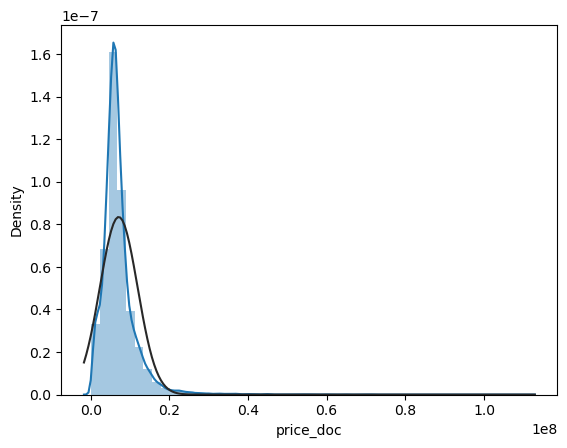

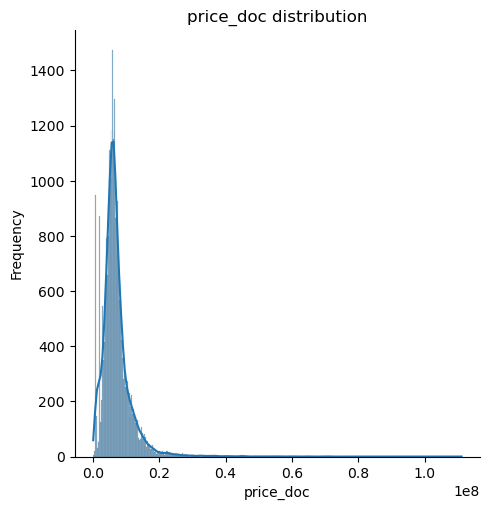

In [6]:
## Question 2: How to carry out normality test on the target variable?
# price_doc is the target variable, according to the Kaggle website.

sns.distplot(train['price_doc'], fit=norm)
sns.displot(train['price_doc'], kde=True)
plt.ylabel('Frequency')
plt.title('price_doc distribution')
plt.show()

C:\Users\manue\AppData\Local\Temp\ipykernel_13496\1720002201.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price_doc'] , fit=norm)


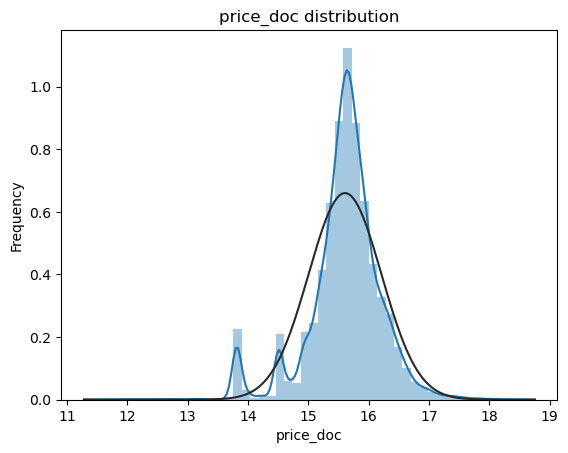

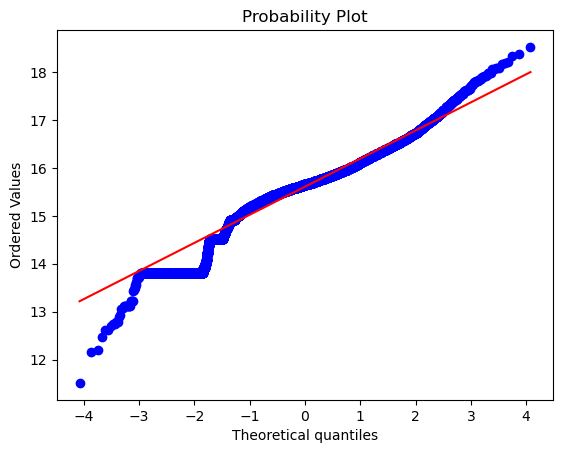

In [7]:
## Question 3. How to convert the target variable into normal distribution?
# Answer: applying a log scale

# log1p (log(1+x), when x = 0, y = 0 as well)
train["price_doc"] = np.log1p(train["price_doc"])

# Check the new distribution 
sns.distplot(train['price_doc'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['price_doc'])


plt.ylabel('Frequency')
plt.title('price_doc distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['price_doc'], plot=plt)
plt.show()

# Correlation Analysis

<Axes: >

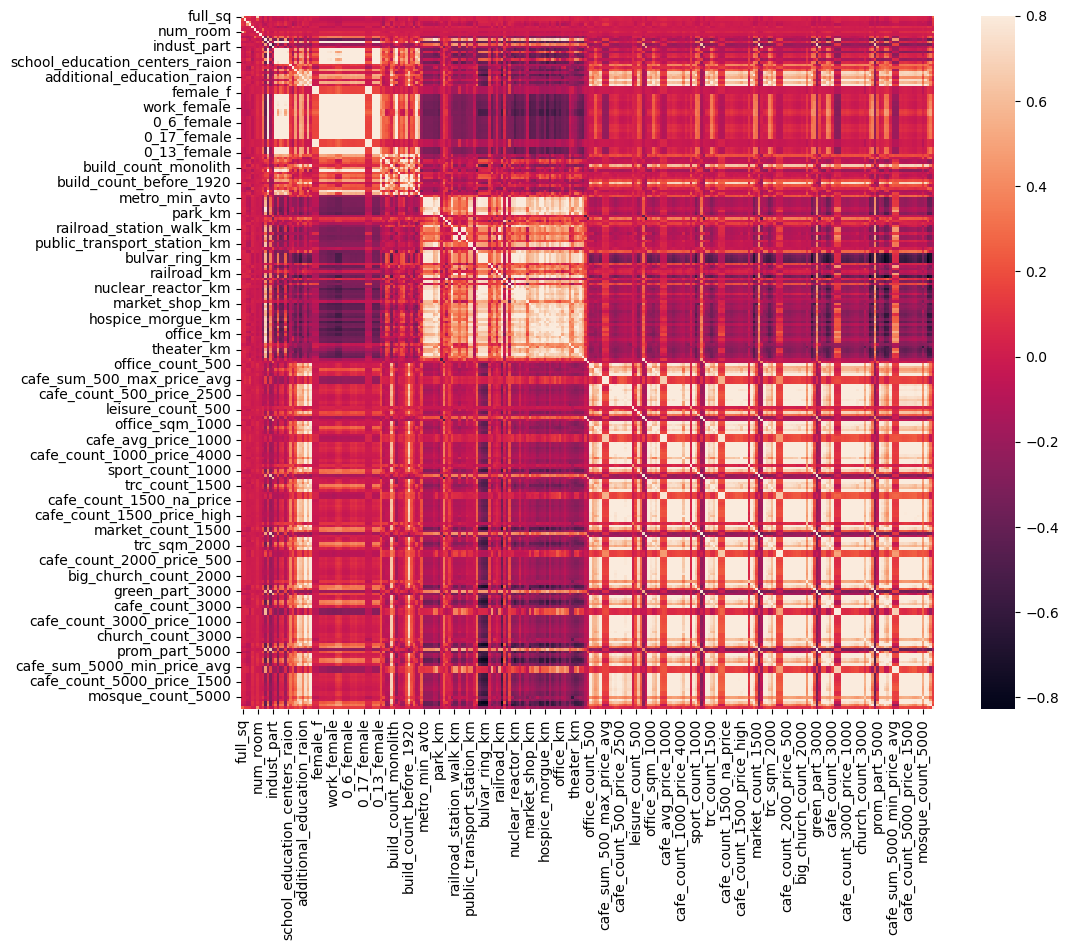

In [8]:
## Question 4: How to plot the pairwise correlation matrix?

# Assuming 'train' is the DataFrame
numeric_columns = train.select_dtypes(include=['number'])

# Calculate the correlation matrix
corrmat = numeric_columns.corr()

# corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

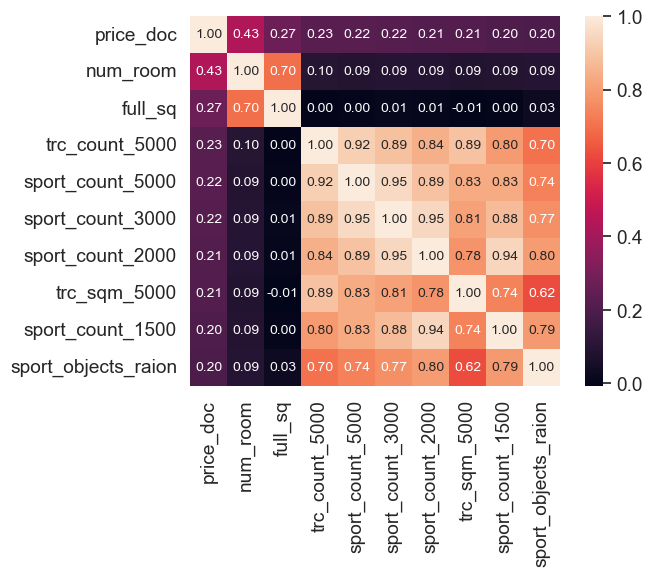

In [9]:
## Question 5: How to plot the pairwise correlation matrix of the top 10 features with respect to the target variable?
# Number of variables for heatmap
k = 10 
# Heatmap 
cols = corrmat.nlargest(k, 'price_doc')['price_doc'].index
cm = train[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# Question 5.1: What's the criterion to select these 10 variables and why? 
# Answer: The criterion used to select the 10 variables for the heatmap is their correlation coefficient with the variable "price_doc", with the highest correlated variables being chosen.

C:\Users\manue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


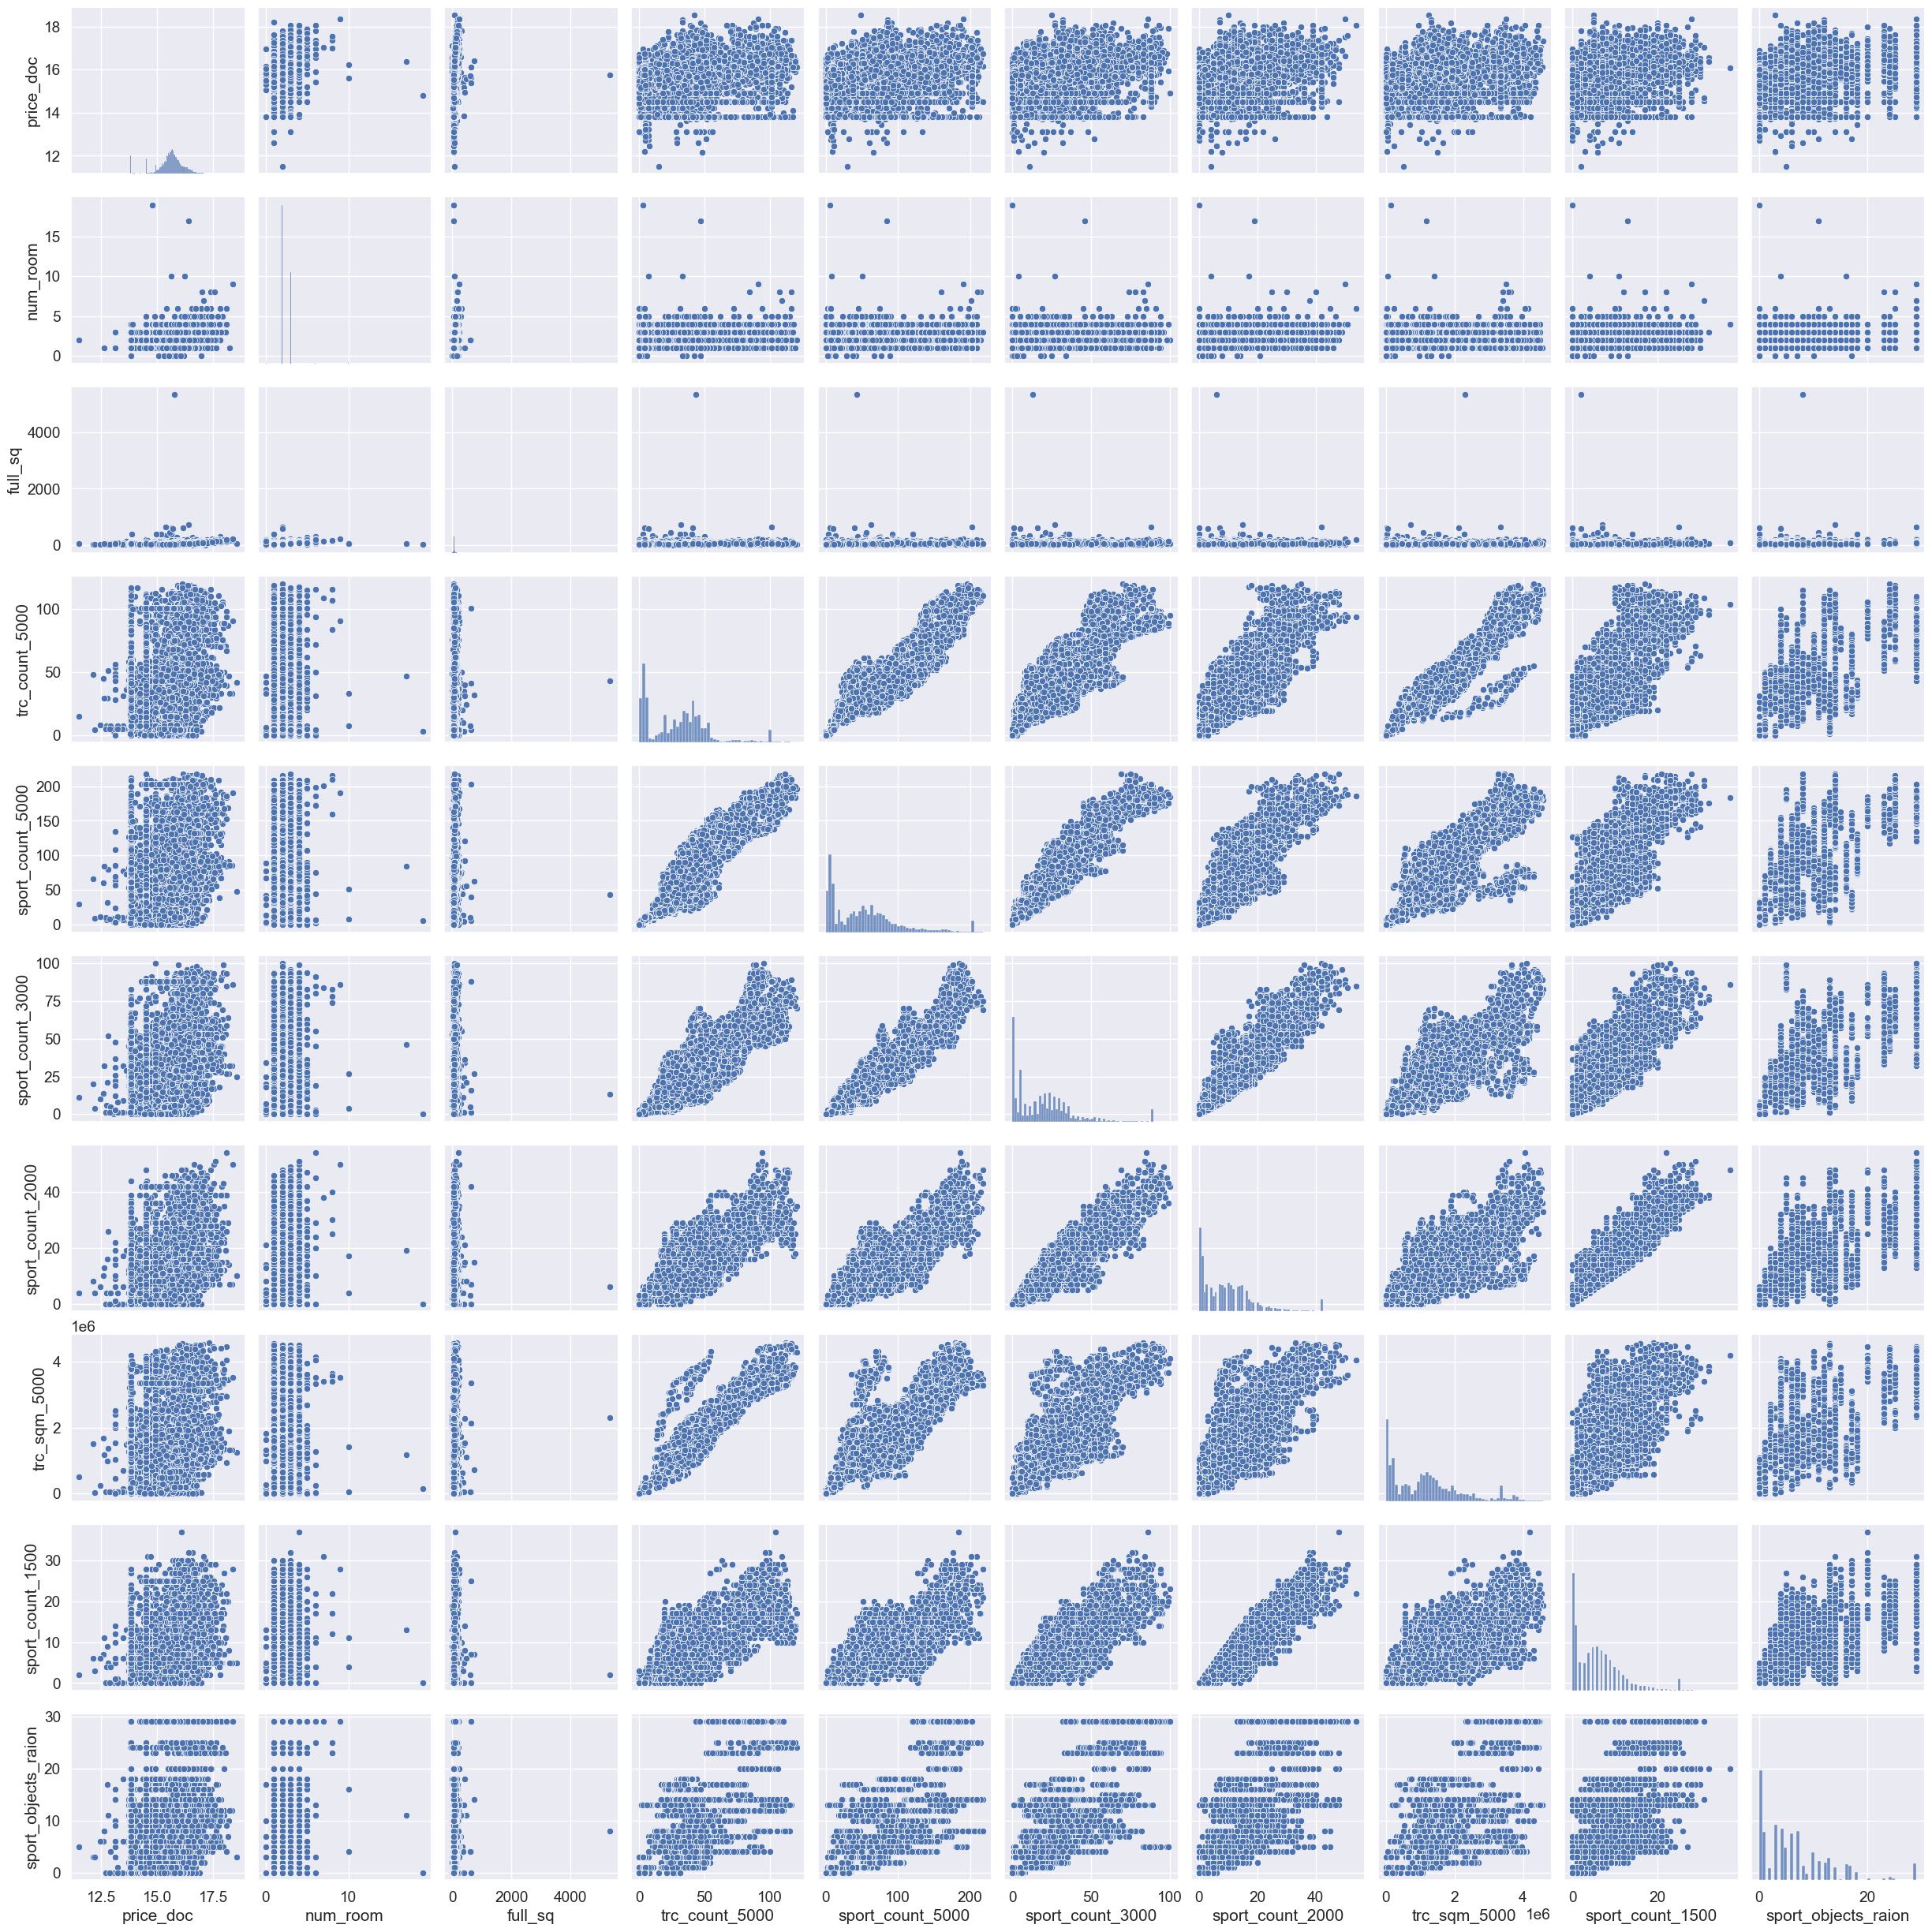

In [10]:
## Question 6: How to plot the pairwise scatterplot?
# sns.set()
# cols = defined in the heatmap before
sns.pairplot(train[cols], height = 2.5)
plt.show()

# Feature Engineering

In [11]:
## Question 7: How to concatenate the train and test datasets?
#print(train.columns)
#print(test.columns)

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.price_doc.values
all_data = pd.concat((train, test)).reset_index(drop=True)

all_data.drop(['price_doc'], axis=1, inplace=True)
print("all_data size is: {}".format(all_data.shape))

all_data size is: (38133, 290)


                                       Missing Ratio
hospital_beds_raion                        46.833451
cafe_sum_500_max_price_avg                 43.112265
cafe_sum_500_min_price_avg                 43.112265
cafe_avg_price_500                         43.112265
build_year                                 38.428658
state                                      37.377075
max_floor                                  25.101618
material                                   25.101618
num_room                                   25.101618
kitch_sq                                   25.101618
preschool_quota                            21.723966
school_quota                               21.713477
cafe_avg_price_1000                        20.313115
cafe_sum_1000_max_price_avg                20.313115
cafe_sum_1000_min_price_avg                20.313115
life_sq                                    19.822726
raion_build_count_with_builddate_info      16.282485
build_count_after_1995                     16.

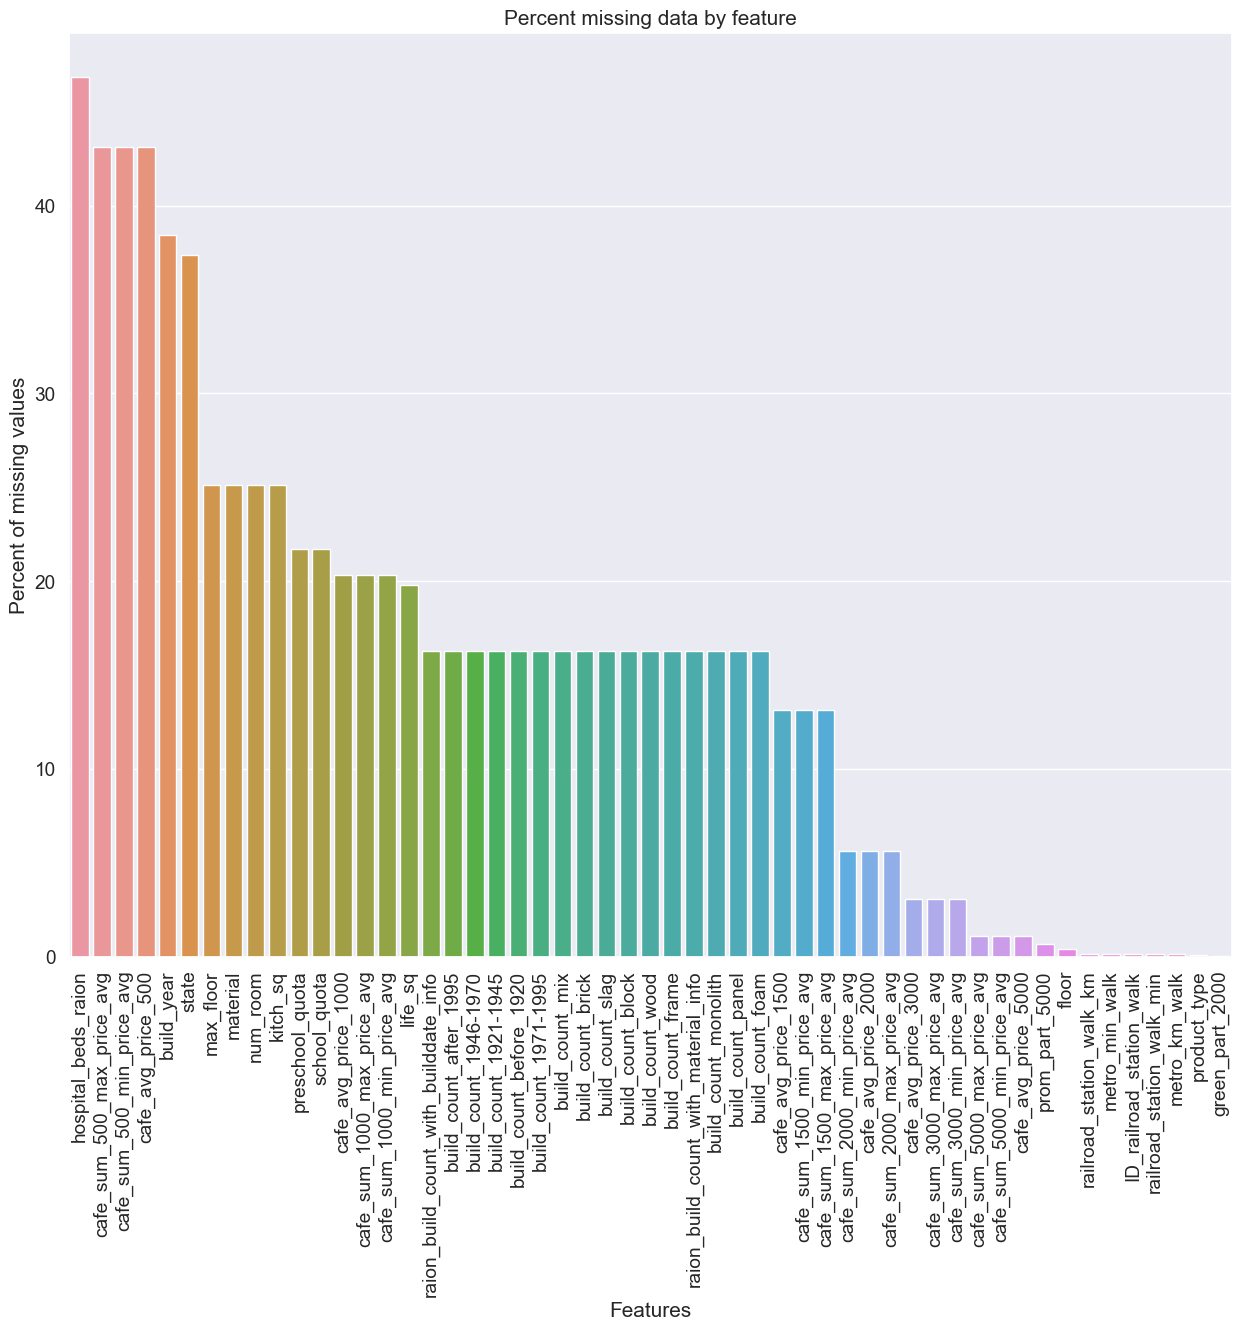

In [12]:
## Question 8: How do you drop features of high missing ratio? How to impute the rest ones with missing values? 
# Verifying the missing ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)#[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.head(20))

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

# Drop features of high missing ratio
columns_to_drop = missing_data[missing_data['Missing Ratio'] > 0.4].index
all_data = all_data.drop(columns=columns_to_drop)

In [13]:
# Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
metro_min_walk,0.154722
metro_km_walk,0.154722
railroad_station_walk_km,0.154722
railroad_station_walk_min,0.154722
ID_railroad_station_walk,0.154722


In [14]:
# Impute the remaining missing values as 0
all_data = all_data.fillna(0)

In [15]:
# Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

print(all_data.shape)

(38133, 244)


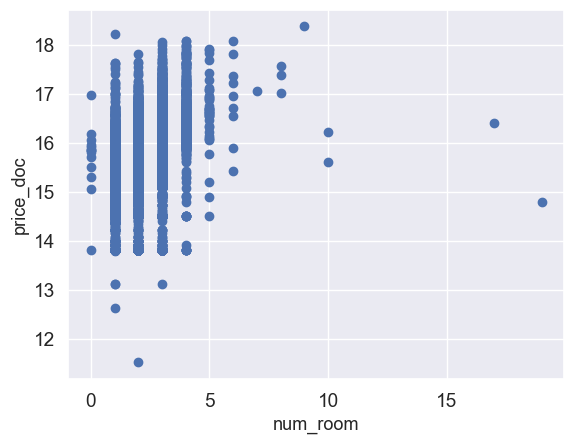

In [18]:
## Question 9: How do you detect outliers and how to remove them?
# Plot the dependent variable x predictor
fig, ax = plt.subplots()
ax.scatter(x = train['num_room'], y = train['price_doc'])
plt.ylabel('price_doc', fontsize=13)
plt.xlabel('num_room', fontsize=13)
plt.show()

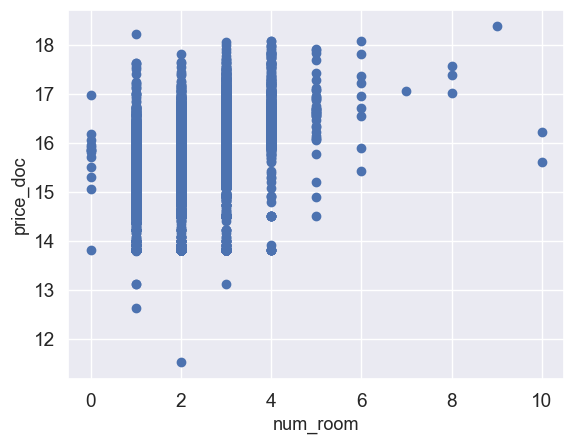

In [20]:
# Deleting outliers
train = train.drop(train[(train['num_room']>15) & (train['price_doc']<17)].index)

# Check the graph again
fig, ax = plt.subplots()
ax.scatter(x = train['num_room'], y = train['price_doc'])
plt.ylabel('price_doc', fontsize=13)
plt.xlabel('num_room', fontsize=13)
plt.show()

In [43]:
## Question 10: How to convert categorical features into numeric ones?

print(all_data.columns)
all_data['product_type'].value_counts()
all_data['sub_area'].value_counts()

Index(['timestamp', 'full_sq', 'product_type', 'sub_area', 'area_m',
       'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_education_centers_raion',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=244)


sub_area
Poselenie Sosenskoe               2073
Poselenie Vnukovskoe              1956
Nekrasovka                        1710
Poselenie Moskovskij              1154
Tverskoe                           859
                                  ... 
Poselenie Shhapovskoe                4
Molzhaninovskoe                      4
Poselenie Kievskij                   3
Poselenie Mihajlovo-Jarcevskoe       2
Poselenie Klenovskoe                 1
Name: count, Length: 146, dtype: int64

In [44]:
# Import LabelEnconder to transform categorical variables into numeric
from sklearn.preprocessing import LabelEncoder

cols = ('product_type', 'sub_area')

# Process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# Shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (38133, 244)


# Training 

In [46]:
## Question 11: How to perform train-test split after the data engineering?

# Getting the new train and test sets
train = all_data[:ntrain]
test = all_data[ntrain:]

In [49]:
## Question 12: How to fine tune the parameters of each model?

# Answer: Fine-tuning the parameters of each model involves adjusting various settings to optimize its performance on a specific task.
# Hyperparameter Tuning is an approach for this, which involves adjusting the hyperparameters of the model.
# Methods for Hyperparameter Tuning include Grid Search, that evaluates a predefined grid of hyperparameter combinations.

# from sklearn.model_selection import GridSearchCV

# param_grid = [
    #{'alpha':[10**-6, 10**-4, 10**-2, 0.1, 0.3, 0.5], 'l1_ratio': [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} # try 6*10=60 combinations  
#]

#ENet = ElasticNet()
#grid_search = GridSearchCV(ENet, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so 60*5 = 400 rounds of training in total
#grid_search.fit(train.values, y_train)
#grid_search.best_params_  # best parameters

In [19]:
## Question 13: What is the difference between lasso and ridge? When to use laso and when to use ridge?

# Answer: L1 (Lasso) and L2 (Ridge) regularization are techniques used to prevent overfitting and improve the generalization of machine learning models by adding a penalty term to the loss function.
# L1 regularization promotes sparsity in the weights, while L2 regularization promotes smoothness.
# In other words, The key difference between Lasso and Ridge regression is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether.
# This works well for feature selection in case we have a huge number of features

In [48]:
## Question 14: How to ensemble the results of several models?

# Answer: Ensembling involves combining predictions from multiple machine learning models to improve overall performance.
# We can stack the models first, a technique that involves training a meta-model on the predictions of the base models as features (Simplest Stacking approach: Averaging base models).
# Then we ensemble to make predictions on new data.
# ensemble = stacked_pred

# Testing 

In [21]:
# Question 15: How to evaluate and submit the model with the test dataset?

# Evaluate the model
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select appropriate metrics based on your problem type
# if classification problem:
  #print("Accuracy:", accuracy_score(y_test, predictions))
  #print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
  #print("Classification Report:\n", classification_report(y_test, predictions))

# if regression problem:
  # from sklearn.metrics import mean_squared_error, r2_score 
  # print("Mean Squared Error:", mean_squared_error(y_test, predictions))
  # print("R-squared:", r2_score(y_test, predictions))

# Submit the model
#sub = pd.DataFrame()
#sub['Id'] = test_ID
#sub['SalePrice'] = ensemble
#sub.to_csv('submission.csv',index=False)